<a href="https://colab.research.google.com/github/mosihan/UOB--Three-models-of-handwritten-digit-recognition/blob/main/NN_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

NN = MLPClassifier()
parameters = {"hidden_layer_sizes": [(50,),(100, ),(200, ),(300, )],
              "learning_rate_init": [0.0005,0.001,0.01,0.1]}

print("grid search")
grid = GridSearchCV(NN, parameters, cv=3, verbose=3,scoring='accuracy',n_jobs=-1)
grid.fit(X_train, y_train)
print("predicting")
print("score: ", grid.score(X_test, y_test)) 
print(grid.best_estimator_) 

end = datetime.datetime.now()
print (end-start)

grid search
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 44.5min finished


predicting
score:  0.9782
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='constant',
              learning_rate_init=0.0005, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0:53:01.788017


In [ ]:
print(grid.cv_results_['mean_test_score'])

[0.9477     0.94421667 0.52778333 0.10783333 0.96055    0.95883333
 0.78093333 0.10876667 0.9683     0.96753333 0.86286667 0.10725
 0.96993333 0.9646     0.81641667 0.10618333]


In [ ]:
from sklearn import metrics
best_model=grid.best_estimator_
y_test_pred=best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print('Training accuracy = {0}%'.format(np.round(best_model.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(best_model.score(X_test, y_test) * 100, 2)))

Training accuracy = 99.79%
Test accuracy = 97.56%


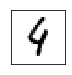

this should be 4
NN model think this is 9


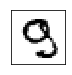

this should be 9
NN model think this is 8


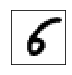

this should be 6
NN model think this is 5


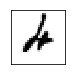

this should be 4
NN model think this is 2


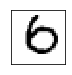

this should be 6
NN model think this is 0


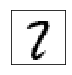

this should be 2
NN model think this is 7


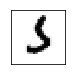

this should be 5
NN model think this is 3


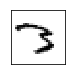

this should be 3
NN model think this is 7


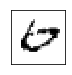

this should be 6
NN model think this is 0


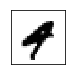

this should be 4
NN model think this is 9


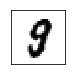

this should be 9
NN model think this is 3


In [ ]:
# show error classiclassification 
import matplotlib

def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((28, 28)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

n=0
for index in np.arange(0,y_test_pred.shape[0]):
  if y_test_pred[index]!=y_test[index]:
    pick_one=index
    plot_an_image(X_test[pick_one, :])
    plt.show()
    print('this should be {}'.format(y_test[pick_one]))
    print('NN model think this is {}'.format(y_test_pred[pick_one]))
    n=n+1
    if n > 10:
      break


# other try

In [ ]:
'''
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
pyplot.figure(figsize=(6, 4.5))
plt.style.use( 'seaborn-whitegrid') 
palette = pyplot.get_cmap('Set1')
#plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams.update({'font.size': 12}) 
 
x = [10, 20, 50, 100]
y_Supervised = [0.706, 0.779, 0.842, 0.885]
y_Self = [0.768, 0.846, 0.884, 0.9]
y_Semi = [0.762, 0.848, 0.875, 0.903]
y_ours = [0.791, 0.869, 0.895, 0.913]

plt.xlim(10, 100) 
plt.ylim(0.7, 0.92)  
 
 
#plt.plot(x, y_Supervised, marker='o', mec='r',label='Supervised')
plt.plot(x, y_Supervised, color=palette(3), marker='*', label='Supervised')
plt.plot(x, y_Self, color=palette(1), marker='^', label='Self-supervised')
plt.plot(x, y_Semi, color=palette(2), marker='s', label='Semi-supervised')
plt.plot(x, y_ours, color=palette(0), marker='o', label='Ours')

plt.legend()  # 让图例生效
#plt.xticks(x, names, rotation=1)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Labeled Data Percentage') #X轴标签
plt.ylabel("AUC") #Y轴标签
pyplot.yticks([0.70, 0.75,0.80,0.85,0.90,0.92])
pyplot.xticks([10, 20, 50, 100])
#plt.title("A simple plot") #标题
plt.savefig('Fig.png',dpi = 300)

In [ ]:
'''
NN = MLPClassifier(solver='sgd',activation = 'logistic',hidden_layer_sizes = (100,),alpha = 1e-5,learning_rate='constant',learning_rate_init=0.1,random_state = 1,verbose = True)
# alpha:默认0.0001,正则化项参数

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',activation = 'relu',hidden_layer_sizes = (100,),alpha = 1e-5,random_state = 1,verbose = True)
clf.fit(X_train, y_train)
from sklearn import metrics
y_test_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

[coef.shape for coef in clf.coefs_]

Iteration 1, loss = 25.09616521
Iteration 2, loss = 5.26695258
Iteration 3, loss = 2.92599398
Iteration 4, loss = 1.82867930
Iteration 5, loss = 1.20168357
Iteration 6, loss = 0.81328030
Iteration 7, loss = 0.55280177
Iteration 8, loss = 0.39484127
Iteration 9, loss = 0.31605565
Iteration 10, loss = 0.15249981
Iteration 11, loss = 0.13739215
Iteration 12, loss = 0.11931387
Iteration 13, loss = 0.06380503
Iteration 14, loss = 0.06739889
Iteration 15, loss = 0.08066144
Iteration 16, loss = 0.07242618
Iteration 17, loss = 0.06669378
Iteration 18, loss = 0.05139386
Iteration 19, loss = 0.03058959
Iteration 20, loss = 0.03090916
Iteration 21, loss = 0.03628057
Iteration 22, loss = 0.08828450
Iteration 23, loss = 0.06671906
Iteration 24, loss = 0.07312869
Iteration 25, loss = 0.08741903
Iteration 26, loss = 0.08883826
Iteration 27, loss = 0.04668931
Iteration 28, loss = 0.02824310
Iteration 29, loss = 0.03764690
Iteration 30, loss = 0.04350346
Iteration 31, loss = 0.05658021
Iteration 32, lo

[(784, 100), (100, 10)]

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1,batch_size=200,max_iter=500)
clf.fit(X_train, y_train)
from sklearn import metrics
y_test_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

[coef.shape for coef in clf.coefs_]

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        85
           1       1.00      0.78      0.88       126
           2       0.86      0.81      0.84       116
           3       0.64      0.96      0.77       107
           4       0.97      0.65      0.78       110
           5       0.93      0.44      0.59        87
           6       0.94      0.75      0.83        87
           7       1.00      0.54      0.70        99
           8       0.38      0.94      0.54        89
           9       0.78      0.70      0.74        94

    accuracy                           0.75      1000
   macro avg       0.84      0.75      0.76      1000
weighted avg       0.85      0.75      0.76      1000



In [ ]:
# plot function
def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((28, 28)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

pick_one = np.random.randint(0, 6000)
plot_an_image(X_train[pick_one, :])
plt.show()
print('this should be {}'.format(y_train[pick_one]))   

In [ ]:
sample_idx = np.random.choice(np.arange(X_train.shape[0]), 100)
sample_images = X_train[sample_idx, :]
sample_images

fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((28, 28))),cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 